<a href="https://colab.research.google.com/github/Pradeep24032004/data_science/blob/main/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
%cd /content/drive/My Drive/datascience
%pwd
%ls

/content/drive/My Drive/datascience
'car data.csv'   insurance.csv  'Sample - Superstore.xls'   titanic.csv
 data.csv        mail_data.csv   sonar.csv                  USA_cars_datasets.csv
 income.csv      nba.csv         spam_ham_dataset.csv       winequality-red.csv


In [10]:
df = pd.read_csv('income.csv')
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


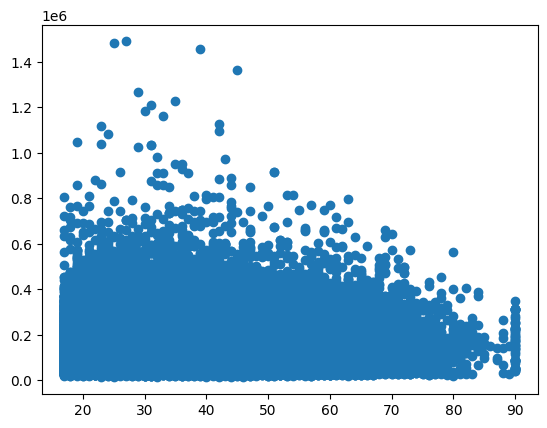

In [11]:
plt.scatter(df['age'], df['fnlwgt'])

In [12]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [13]:
y_predicted = km.fit_predict(df[['age','fnlwgt']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, ..., 1, 2, 0], dtype=int32)

In [14]:
df['cluster'] = y_predicted
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level,cluster
0,39,77516,13,2174,0,40,0,2
1,50,83311,13,0,0,13,0,2
2,38,215646,9,0,0,40,0,0
3,53,234721,7,0,0,40,0,0
4,28,338409,13,0,0,40,0,1


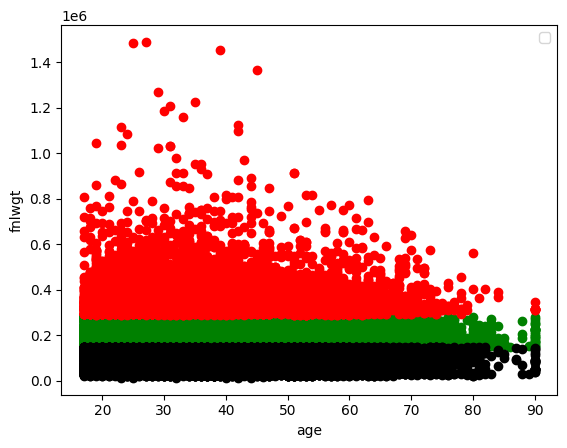

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age, df1['fnlwgt'], color='green')
plt.scatter(df2.age, df2['fnlwgt'], color='red')
plt.scatter(df3.age, df3['fnlwgt'], color='black')

plt.xlabel('age')
plt.ylabel('fnlwgt')
plt.legend()

In [19]:
#min max scaler used to scale the x and y axis values to get the correct value
scaler = MinMaxScaler()
scaler.fit(df[['fnlwgt']])
df['fnlwgt'] = scaler.transform(df[['fnlwgt']])
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level,cluster
0,39,0.044131,13,2174,0,40,0,2
1,50,0.048052,13,0,0,13,0,2
2,38,0.137581,9,0,0,40,0,0
3,53,0.150486,7,0,0,40,0,0
4,28,0.220635,13,0,0,40,0,1
...,...,...,...,...,...,...,...,...
48837,39,0.137428,13,0,0,36,0,0
48838,64,0.209130,9,0,0,40,0,1
48839,38,0.245379,13,0,0,50,0,1
48840,44,0.048444,13,5455,0,40,0,2


In [20]:
#scaling the age value
scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level,cluster
0,0.301370,0.044131,13,2174,0,40,0,2
1,0.452055,0.048052,13,0,0,13,0,2
2,0.287671,0.137581,9,0,0,40,0,0
3,0.493151,0.150486,7,0,0,40,0,0
4,0.150685,0.220635,13,0,0,40,0,1
...,...,...,...,...,...,...,...,...
48837,0.301370,0.137428,13,0,0,36,0,0
48838,0.643836,0.209130,9,0,0,40,0,1
48839,0.287671,0.245379,13,0,0,50,0,1
48840,0.369863,0.048444,13,5455,0,40,0,2


In [21]:
#use kmean algorithm once again on scaling dataset
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','fnlwgt']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [24]:
df['cluster'] = y_predicted
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level,cluster
0,0.301370,0.044131,13,2174,0,40,0,2
1,0.452055,0.048052,13,0,0,13,0,2
2,0.287671,0.137581,9,0,0,40,0,2
3,0.493151,0.150486,7,0,0,40,0,0
4,0.150685,0.220635,13,0,0,40,0,1
...,...,...,...,...,...,...,...,...
48837,0.301370,0.137428,13,0,0,36,0,2
48838,0.643836,0.209130,9,0,0,40,0,0
48839,0.287671,0.245379,13,0,0,50,0,2
48840,0.369863,0.048444,13,5455,0,40,0,2


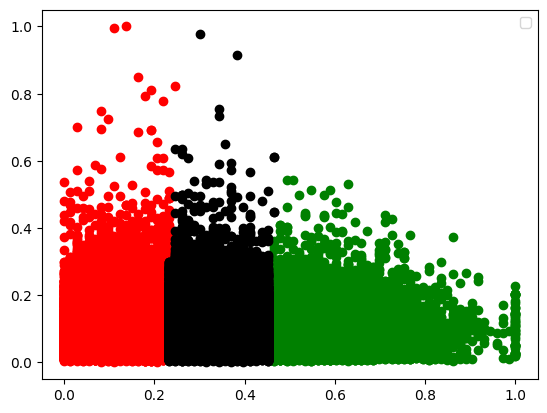

In [25]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age, df1['fnlwgt'], color='green')
plt.scatter(df2.age, df2['fnlwgt'], color='red')
plt.scatter(df3.age, df3['fnlwgt'], color='black')
plt.legend()

In [26]:
#centroids of the clusters
km.cluster_centers_

array([[0.58231614, 0.11184609],
       [0.11798451, 0.12603951],
       [0.3340143 , 0.11796831]])

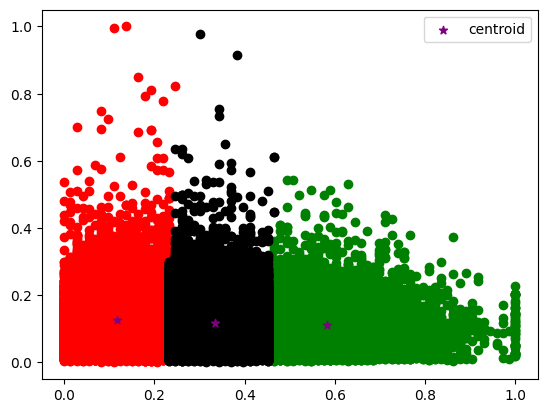

In [28]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age, df1['fnlwgt'], color='green')
plt.scatter(df2.age, df2['fnlwgt'], color='red')
plt.scatter(df3.age, df3['fnlwgt'], color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [29]:
#elbow method algorithm for finding k value
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['age','fnlwgt']])
  sse.append(km.inertia_)

print(sse)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[1972.1482330330555, 794.4994136352984, 513.1704196502035, 404.0664501837579, 334.6566147537159, 286.2136892733678, 248.61751628773865, 221.92831572786645, 200.5336357629132]


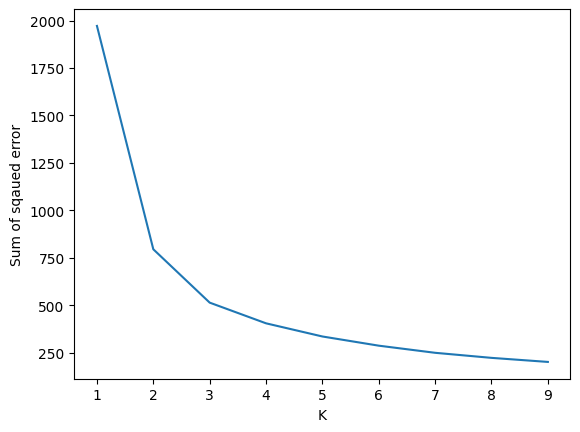

In [30]:
plt.xlabel('K')
plt.ylabel('Sum of sqaued error')
plt.plot(k_rng, sse)